# Data preparation

##**Dataset Import from kaggle**

I have uploaded the necessary file to Kaggle as a private dataset, which should enable us to import it more quickly into Google Colab. Let's streamline the import process.

In [1]:
from google.colab import files

In [2]:

# Import the "files" module from the "google.colab" package to easily upload and download files in the Google Colaboratory environment.
from google.colab import files


In [3]:
#Here you just need to upload the API (kaggle.json) file I will be giving you.
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohammadjaberhossain","key":"6869aff67a258c809fca6a89975b115e"}'}

In [4]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!pip install Monai
!pip install matplotlib
!pip install numpy
!pip install tqdm
!pip install glob2
!pip install dicom2nifti
!pip install pytest-shutil
!pip install nibabel
!pip install medpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 95.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 12.8 MB/s eta 0:00:00
  Created wheel for medpy: filename=MedPy-0.4.0-py3-none-any.whl size=214945 sha256=e248e87605f9ef83a05e05f41cea57594841f0f42db56456c421e1e23230bc31
  Stored in directory: /root/.cache/pip/wheels/d4/32/c7/6380ab2edb8cca018d39a0f1d43250fd9791922c963117de46
Successfully built medpy


##**File handling together**

In [6]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [7]:
# Import the "os" module
import os
# Set the environment variable "KAGGLE_CONFIG_DIR" to the "/content" directory.
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [8]:
#Dataser import from kaggle as a zip
#!kaggle datasets download -d mohammadjaberhossain/ratdata

#!kaggle datasets download -d mohammadjaberhossain/datareadymice

!kaggle datasets download -d mohammadjaberhossain/finalmicedata

100% 1.72G/1.72G [01:39<00:00, 19.6MB/s]
100% 1.72G/1.72G [01:39<00:00, 18.5MB/s]


In [9]:
#Unzipp the imported zip file
#!7z x datareadymice.zip
!7z x finalmicedata.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 1844136352 bytes (1759 MiB)

Extracting archive: finalmicedata.zip
--
Path = finalmicedata.zip
Type = zip
Physical Size = 1844136352

  0%      0% 2 - data_folder/test_image/200170928CH_Exp8_M33.nii                                                          0% 4 - data_folder/test_image/20170222CH_Exp3_zfp_M07.nii                                                             1% 6 - data_folder/test_image/20170405CH_SC_M15.nii         

In [10]:
folder_path = '/content/data_folder/train_image'
# get the list of all files in the folder
file_list = os.listdir(folder_path)
# count the number of files in the folder
num_files = len(file_list)
print("Number of files in Train Image folder:", num_files)

folder_path = '/content/data_folder/train_mask'
# get the list of all files in the folder
file_list = os.listdir(folder_path)
# count the number of files in the folder
num_files = len(file_list)
print("Number of files in train mask folder:", num_files)

folder_path = '/content/data_folder/test_image'
# get the list of all files in the folder
file_list = os.listdir(folder_path)
# count the number of files in the folder
num_files = len(file_list)
print("Number of files in test image folder:", num_files)

folder_path = test_mask_path = '/content/data_folder/test_mask'
# get the list of all files in the folder
file_list = os.listdir(folder_path)
# count the number of files in the folder
num_files = len(file_list)
print("Number of files in test Mask folder:", num_files)

folder_path = '/content/data_folder/val_image'
# get the list of all files in the folder
file_list = os.listdir(folder_path)
# count the number of files in the folder
num_files = len(file_list)
print("Number of files in val image folder:", num_files)

folder_path = '/content/data_folder/val_mask'
# get the list of all files in the folder
file_list = os.listdir(folder_path)
# count the number of files in the folder
num_files = len(file_list)
print("Number of files in val mask folder:", num_files)

Number of files in Train Image folder: 231
Number of files in train mask folder: 231
Number of files in test image folder: 66
Number of files in test Mask folder: 66
Number of files in val image folder: 34
Number of files in val mask folder: 34


In [ ]:
#!rm -r '/content/data_folder'


#Import

In [11]:
import os
from glob import glob
import shutil
from tqdm import tqdm
import dicom2nifti
import numpy as np
import nibabel as nib
from monai.data import DataLoader, Dataset, CacheDataset
from monai.utils import set_determinism

from monai.transforms import(
    Compose,
    AddChanneld,
    LoadImaged,
    Resized,
    ToTensord,
    Spacingd,
    Orientationd,
    ScaleIntensityRanged,
    CropForegroundd,
)
from monai.transforms import NormalizeIntensityd

from monai.data import DataLoader, Dataset, CacheDataset
from monai.utils import set_determinism


import os
from glob import glob
import shutil
from tqdm import tqdm
import numpy as np
import nibabel as nib

#from prepare import *
#from train import *

from monai.transforms import NormalizeIntensityd
from monai.data import DataLoader, Dataset, CacheDataset
from monai.utils import set_determinism
from monai.utils import set_determinism

from monai.utils import first
import matplotlib.pyplot as plt
import torch

from monai.networks.nets import UNet
from monai.networks.layers import Norm
from monai.losses import DiceLoss, DiceCELoss

import torch
import os
import numpy as np
from medpy.metric import dc
import nibabel as nib
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from medpy.metric.binary import hd95
from medpy.metric.binary import hd

from monai.utils import first
import matplotlib.pyplot as plt
import numpy as np
from monai.losses import DiceLoss
from tqdm import tqdm

import os
import shutil
import numpy as np

#from prepare import *
#from train import *

from monai.transforms import NormalizeIntensityd
from monai.data import DataLoader, Dataset, CacheDataset
from monai.utils import set_determinism
from monai.utils import set_determinism

from monai.utils import first
import matplotlib.pyplot as plt
import torch

from monai.networks.nets import UNet, DynUNet
from monai.networks.layers import Norm
from monai.losses import DiceLoss, DiceCELoss

from monai.transforms import(
    Compose,
    AddChanneld,
    LoadImaged,
    Resized,
    ToTensord,
    Spacingd,
    Orientationd,
    ScaleIntensityRanged,
    CropForegroundd,
    AsDiscreted,
    EnsureChannelFirstd,
)

In [12]:
import torch
device = torch.device('cuda')
print("Cuda_available? ", torch.cuda.is_available())
print("Name: ", torch.cuda.get_device_name(0))
print("Device count: ", torch.cuda.device_count())
print("current device: ", torch.cuda.current_device())
print("Select device: ", torch.cuda.device(0))
print("get device name: ",torch.cuda.get_device_name(0))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #finally got the solution

Cuda_available?  True
Name:  Tesla T4
Device count:  1
current device:  0
Select device:  <torch.cuda.device object at 0x7d837b5ce7a0>
get device name:  Tesla T4


#Model

In [17]:
from torch import nn
from torch.nn import Conv3d, BatchNorm3d, ReLU, Sigmoid
import numpy as np
import torch
from torch.nn.functional import interpolate

class ResNet(nn.Module):
    def __init__(self, in_filters):
        super(ResNet, self).__init__()

        self.seq = nn.Sequential(
                ReLU(),
                BatchNorm3d(in_filters),
                Conv3d(in_filters, in_filters, 3, padding=1),
                ReLU(),
                BatchNorm3d(in_filters),
                Conv3d(in_filters, in_filters, 3, padding=1)
            )

    def forward(self, x):
        return x + self.seq(x)

    def __str__(self):
        return "ResNet"

class Bottleneck(nn.Module):
    def __init__(self, in_filters, out_filters):
        super(Bottleneck, self).__init__()

        self.seq = nn.Sequential(
                ReLU(),
                BatchNorm3d(in_filters),
                Conv3d(in_filters, out_filters, 1)
            )

    def forward(self, x):
        return self.seq(x)

    def __str__(self):
        return "Bottleneck"




class RatLesNetv2(nn.Module):

    def __init__(self, modalities, filters):
        super(RatLesNetv2, self).__init__()

        self.conv1 = Conv3d(modalities, filters, 1)

        self.block1 = ResNet(filters)
        self.mp1 = nn.modules.MaxPool3d(2, ceil_mode=True)

        self.block2 = ResNet(filters)
        self.mp2 = nn.modules.MaxPool3d(2, ceil_mode=True)

        self.block3 = ResNet(filters)
        self.mp3 = nn.modules.MaxPool3d(2, ceil_mode=True)

        self.bottleneck1 = Bottleneck(filters, filters)
        self.block4 = ResNet(filters*2)

        self.bottleneck2 = Bottleneck(filters*2, filters)
        self.block5 = ResNet(filters*2)

        self.bottleneck3 = Bottleneck(filters*2, filters)
        self.block6 = ResNet(filters*2)

        self.bottleneck4 = Bottleneck(filters*2, 2)

    def forward(self, x):
        x = self.conv1(x)
        block1_out = self.block1(x)
        block1_size = block1_out.size()

        x = self.mp1(block1_out)
        block2_out = self.block2(x)
        block2_size = block2_out.size()

        x = self.mp2(block2_out)
        block3_out = self.block3(x)
        block3_size = block3_out.size()

        x = self.mp3(block3_out)
        b1 = self.bottleneck1(x) #upro here

        x = interpolate(b1, block3_size[2:], mode="trilinear")
        x = torch.cat([x, block3_out], dim=1)

        block4_out = self.block4(x)
        b2 = self.bottleneck2(block4_out)

        x = interpolate(b2, block2_size[2:], mode="trilinear")
        x = torch.cat([x, block2_out], dim=1)

        block5_out = self.block5(x)
        b3 = self.bottleneck3(block5_out)

        x = interpolate(b3, block1_size[2:], mode="trilinear")
        x = torch.cat([x, block1_out], dim=1)

        block6_out = self.block6(x)
        b4 = self.bottleneck4(block6_out)

        #softed = torch.functional.F.softmax(b4, dim=1)
        # Must be a tuple
        return b4

In [18]:
filters = 32
modalities = 1

In [19]:
device = torch.device('cuda')

model = RatLesNetv2(modalities, filters).to(device)

#Visual Output

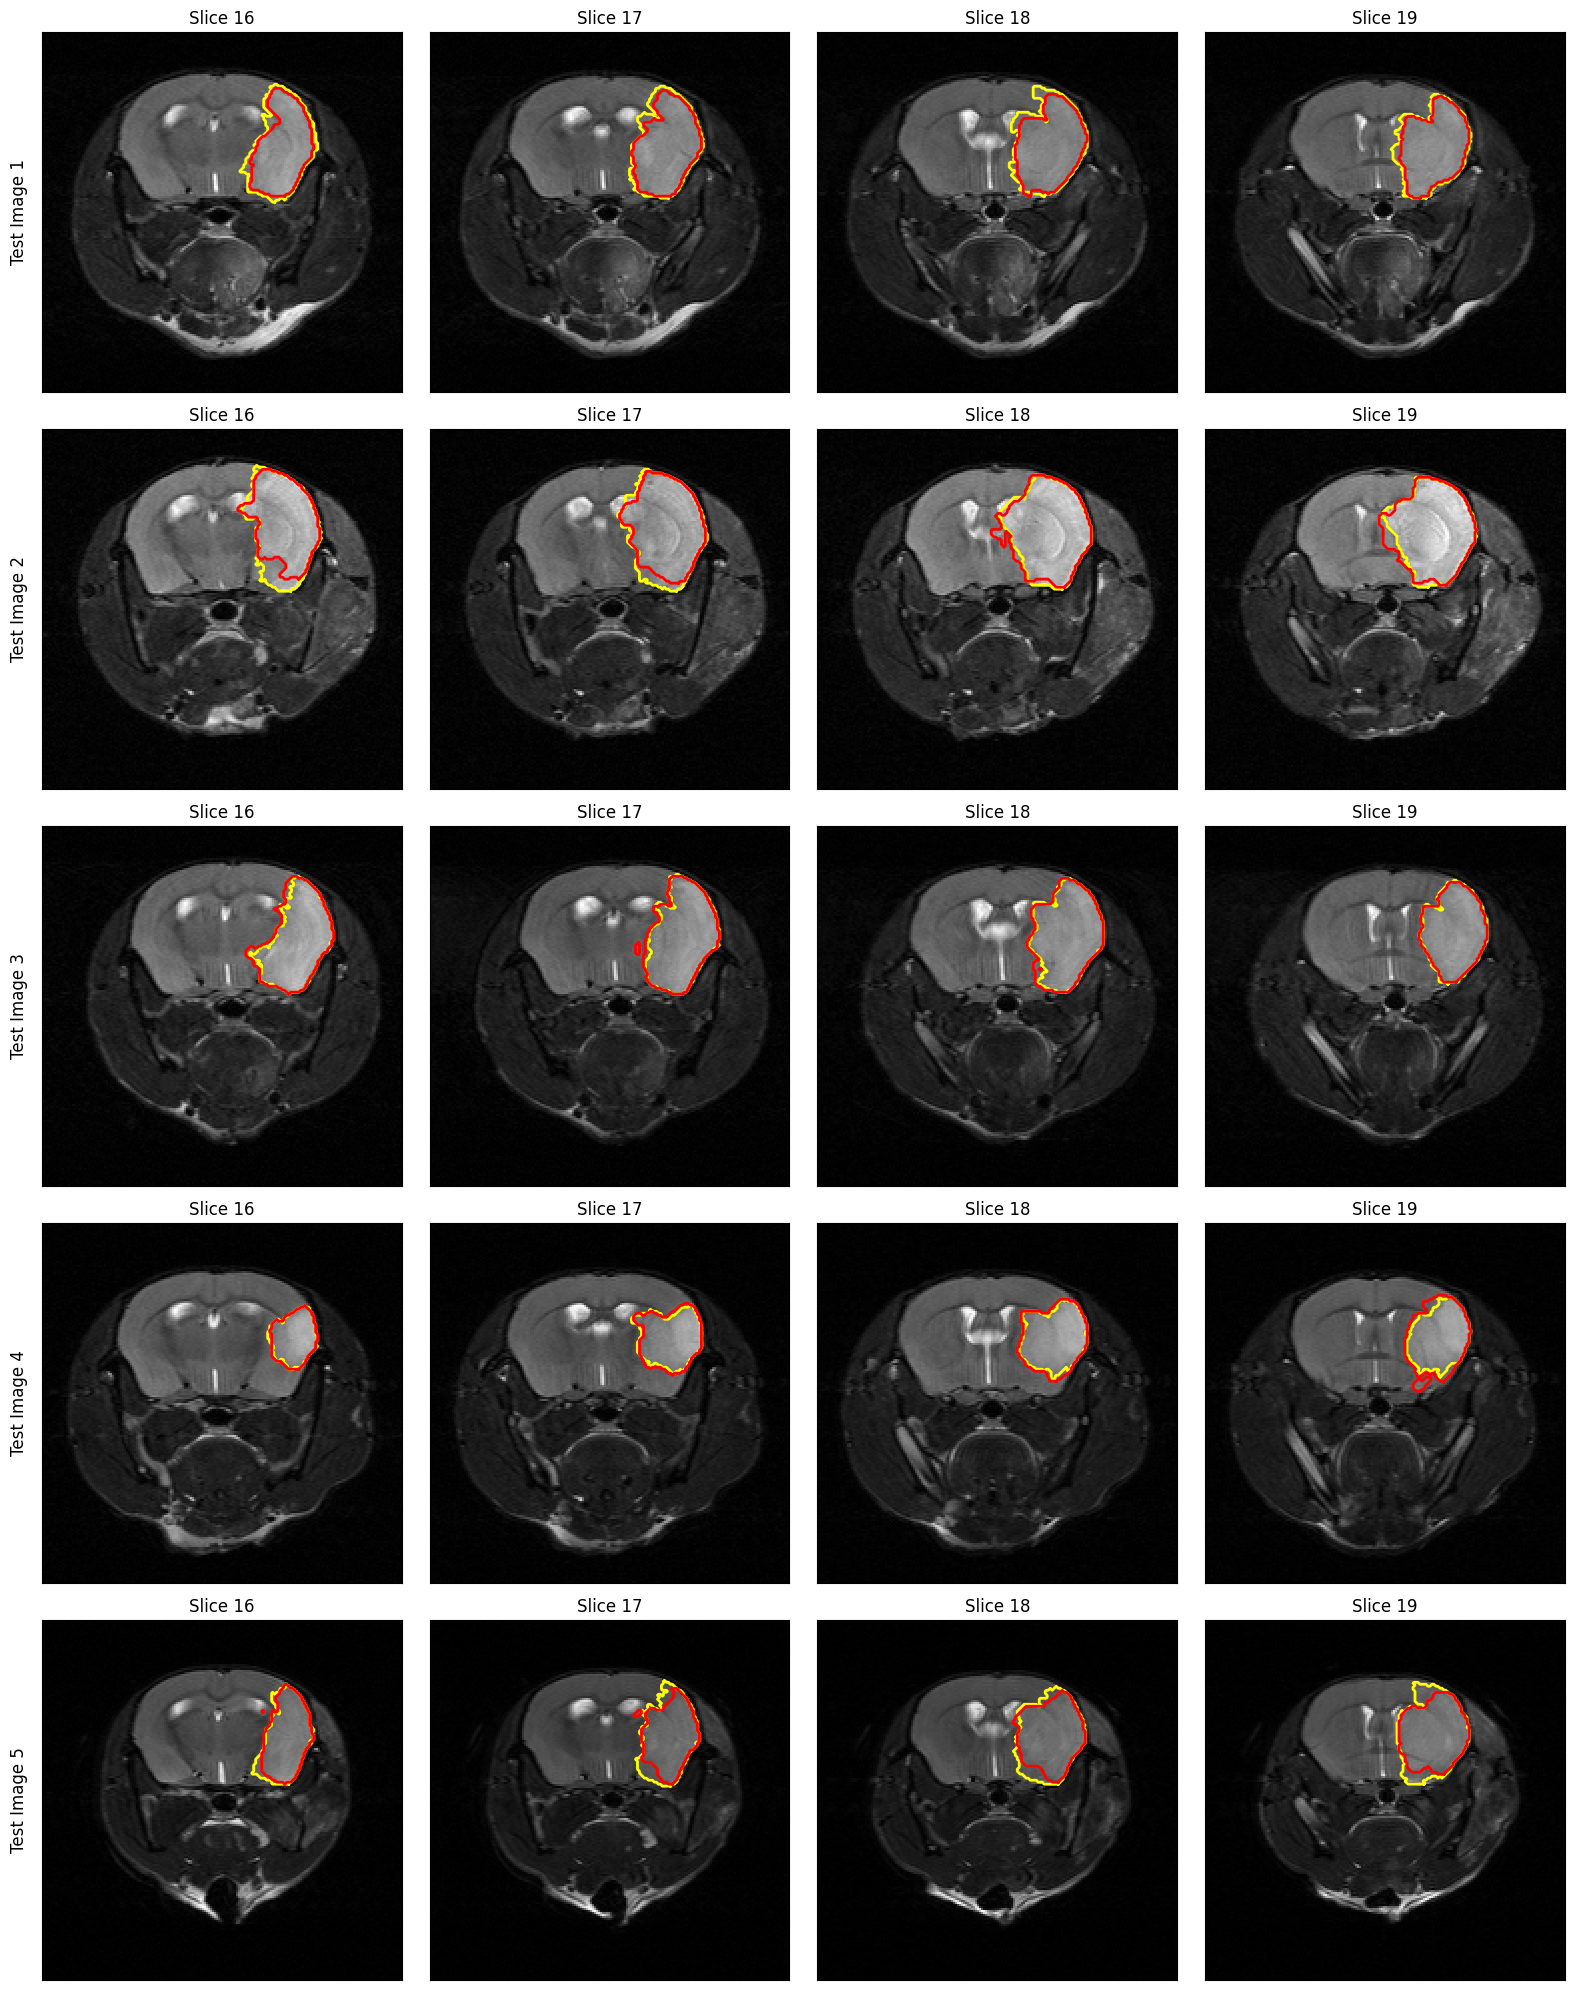

In [20]:
from skimage import measure
from PIL import Image
import io
import matplotlib.pyplot as plt




def plot_slices(img_path, mask_path, selected_slices, model, model_path, device, row, axes):
    img_transforms = Compose(
        [
            LoadImaged(keys=["vol"]),
            ToTensord(keys=["vol"]),
        ]
    )


    img_data_dict = img_transforms({"vol": img_path})
    img_tensor = img_data_dict["vol"].to(device)
    img_array = img_tensor.cpu().detach().numpy()[:, :, :]


    gt_transforms = Compose(
        [
            LoadImaged(keys=["seg"]),
            ToTensord(keys=["seg"]),
        ]
    )

    gt_data_dict = gt_transforms({"seg": mask_path})
    gt_mask_tensor = gt_data_dict["seg"].to(device)
    gt_mask_array = gt_mask_tensor.cpu().detach().numpy()[:, :, :]

    transforms = Compose(
        [
            LoadImaged(keys=["vol", "seg"]),
            EnsureChannelFirstd(keys=["vol", "seg"]),
            AsDiscreted(keys=["seg"], to_onehot=2),
            NormalizeIntensityd(keys=["vol"]),
            ToTensord(keys=["vol", "seg"]),

        ]
    )


    data_dict = transforms({"vol": img_path, "seg": mask_path})
    img_tensor = data_dict["vol"].to(device)

    model_dict = model.state_dict()
    state_dict = torch.load(model_path, map_location=device)
    state_dict = {k: v for k, v in state_dict.items() if k in model_dict}
    model_dict.update(state_dict)
    model.load_state_dict(model_dict)
    model.to(device)

    with torch.no_grad():
        model.eval()
        img_tensor = img_tensor.unsqueeze(0)
        pred_tensor = model(img_tensor)
    pred_array = np.argmax(pred_tensor.cpu().detach().numpy()[0], axis=0)


    # Binarize the masks
    gt_mask_array = np.where(gt_mask_array > 0, 1, 0)
    pred_array = np.where(pred_array > 0, 1, 0)




    # Compute the starting indices for the crop
    start_idx = (img_array.shape[0] - 180) // 2
    end_idx = start_idx + 180

    # Perform the crop
    img_array = img_array[start_idx:end_idx, start_idx:end_idx, :]
    gt_mask_array = gt_mask_array[start_idx:end_idx, start_idx:end_idx, :]
    pred_array = pred_array[start_idx:end_idx, start_idx:end_idx, :]

    img_array = np.rot90(img_array, k=-1, axes=(0, 1))  # rotates the image array 90 degrees to the right
    gt_mask_array = np.rot90(gt_mask_array, k=-1, axes=(0, 1))  # rotates the ground truth mask array 90 degrees to the right
    pred_array = np.rot90(pred_array, k=-1, axes=(0, 1))  # rotates the prediction array 90 degrees to the right



    for col, i in enumerate(selected_slices):
      ax = axes[row, col]

      ax.imshow(img_array[:, :, i], cmap='gray', alpha=1.0)

      # contour for ground truth mask
      # Inside the for loop for the contour plot:
      contours_gt = measure.find_contours(gt_mask_array[:, :, i], 0.5)
      for n, contour in enumerate(contours_gt):
          ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color='yellow')

      contours_pred = measure.find_contours(pred_array[:, :, i], 0.5)
      for n, contour in enumerate(contours_pred):
          ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color='red')

      ax.set_xticks([])
      ax.set_yticks([])

      ax.set_title(f"Slice {i}")


    axes[row, 0].set_ylabel(f"Test Image {row+1}", rotation=90, size='large', labelpad=10)



# Initialize figure
#fig, axes = plt.subplots(nrows=len(img_paths), ncols=len(selected_slices), figsize=(4*len(selected_slices), 4*len(img_paths)))



# Initialize model once
model = RatLesNetv2(modalities, filters).to(device)

model_path = "/content/drive/MyDrive/Thesis/Final/TL_40images_noaugment_encoder/best_metric_model.pth"

# Paths of your images and masks
img_paths = ["/content/data_folder/test_image/20170920CH_Exp09_M11.nii", "/content/data_folder/test_image/20170628CH_Exp6_ZFPtm1a_M14.nii",
             "/content/data_folder/test_image/20170920CH_Exp09_M12.nii","/content/data_folder/test_image/20170921CH_Exp09_M24.nii",
             "/content/data_folder/test_image/20190320CH_Exp4_M18.nii"]
mask_paths = ["/content/data_folder/test_mask/20170920CH_Exp09_M11_mask.nii","/content/data_folder/test_mask/20170628CH_Exp6_ZFPtm1a_M14_mask.nii",
             "/content/data_folder/test_mask/20170920CH_Exp09_M12_mask.nii","/content/data_folder/test_mask/20170921CH_Exp09_M24_mask.nii",
             "/content/data_folder/test_mask/20190320CH_Exp4_M18_mask.nii"]

selected_slices = [16, 17, 18, 19]
fig, axes = plt.subplots(nrows=len(img_paths), ncols=len(selected_slices), figsize=(4*len(selected_slices), 4*len(img_paths)))

for row, (img_path, mask_path) in enumerate(zip(img_paths, mask_paths)):
    plot_slices(img_path, mask_path, selected_slices, model, model_path, device, row, axes)

plt.tight_layout()
plt.show()

